#Natural Language Processing

###Import all the necessary things

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from wordcloud import WordCloud

Install a list of words through the nltk package as stopwords

In [2]:
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stopwords is a list of strings that don't give any meaning to the text. Things that aren't useful to us that we'll want to remove

In [3]:
len(stopwords)

179

In [9]:
url = "https://data.london.gov.uk/download/animal-rescue-incidents-attended-by-lfb/01007433-55c2-4b8a-b799-626d9e3bc284/Animal%20Rescue%20incidents%20attended%20by%20LFB%20from%20Jan%202009.csv"
df = pd.read_csv(url)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

In [ ]:
df.head(4)

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
0,139091,01/01/2009 03:01,2009,2008/09,Special Service,1.0,2.0,255,510.0,Redacted,...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091,01/01/2009 08:51,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091,04/01/2009 10:07,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091,05/01/2009 12:27,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,1.000000e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684


In [ ]:
len(df)

10204

In [ ]:
len(df[df.FinalDescription == "Redacted"])

1506

In [ ]:
df[df.FinalDescription == "Redacted"]

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
0,139091,01/01/2009 03:01,2009,2008/09,Special Service,1.0,2.0,255,510.0,Redacted,...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091,01/01/2009 08:51,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091,04/01/2009 10:07,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091,05/01/2009 12:27,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,1.000000e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
4,3553091,06/01/2009 15:23,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,166541-25102023,25/10/2023 09:14,2023,2023/24,Special Service,1.0,1.0,388,388.0,Redacted,...,NaN,HANDSWORTH ROAD,21103371.0,N17,NaN,NaN,532950,189550,NaN,NaN
10189,166817-25102023,25/10/2023 18:41,2023,2023/24,Special Service,1.0,1.0,388,388.0,Redacted,...,NaN,LANADRON CLOSE,21501798.0,TW7,NaN,NaN,515750,176450,NaN,NaN
10191,167249-26102023,26/10/2023 13:17,2023,2023/24,Special Service,1.0,2.0,388,776.0,Redacted,...,2.000040e+11,HUNTSMAN STREET,22502790.0,SE17,533034.0,178559.0,533050,178550,51.490341,-0.085170
10197,168295-28102023,28/10/2023 10:42,2023,2023/24,Special Service,1.0,1.0,388,388.0,Redacted,...,NaN,NAPOLEON ROAD,20900724.0,E5,NaN,NaN,534650,186050,NaN,NaN


In [ ]:
df[df.FinalDescription.isna() == True]

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude
662,24109,06/03/2010 14:58,2010,2009/10,Special Service,1.0,1.0,260,260.0,NaN,...,5.870016e+09,Amesbury Close,22601220.0,KT4,523396.0,166276.0,523350,166250,51.382128,-0.228210
3027,4149,29/01/2014 15:03,2014,2013/14,Special Service,1.0,3.0,290,870.0,NaN,...,NaN,Thames Road,NaN,DA1,552838.0,175418.0,552850,175450,51.457114,0.198500
5489,000018-05062018M,05/06/2018 16:01,2018,2018/19,Special Service,1.0,1.0,333,333.0,NaN,...,2.070162e+08,LEA ROAD,4810028.0,EN9,537501.0,199679.0,537550,199650,51.679060,-0.012614
5708,000014-03092018M,03/09/2018 02:47,2018,2018/19,Special Service,2.0,3.0,333,999.0,NaN,...,5.870087e+09,LITTLE WOODCOTE LANE,22605502.0,CR8,529081.0,161589.0,529050,161550,51.338751,-0.148258
6427,000015-23112019M,23/11/2019 20:54,2019,2019/20,Special Service,1.0,1.0,339,339.0,NaN,...,1.000000e+11,MILL ROAD,21401294.0,UB7,505440.0,179073.0,505450,179050,51.500779,-0.482315


In [ ]:
df1 = df[df.FinalDescription != "Redacted"]
df2 = df1[df1.FinalDescription.isna() == False]

In [ ]:
len(df1)

8698

In [ ]:
len(df2)

8693

Checking that df2 correctly removed NAs:

In [ ]:
df2[df2.FinalDescription.isna() == True]

,IncidentNumber,DateTimeOfCall,CalYear,FinYear,TypeOfIncident,PumpCount,PumpHoursTotal,HourlyNotionalCost(£),IncidentNotionalCost(£),FinalDescription,...,UPRN,Street,USRN,PostcodeDistrict,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude


In [ ]:
df2.FinalDescription

286                          KITTEN WITH HEAD STUCK IN JAR
287                                      CAT STUCK UP TREE
288                              BIRD TRAPPED IN DRAINPIPE
289                                    DEER STUCK IN FENCE
290                                   CAT TRAPPED ON FENCE
                               ...                        
10198                        CAT TRAPPED UNDER FLOORBOARDS
10200    KITTEN TRAPPED IN BRANCH OF TREE - OWNER ON SCENE
10201                           ASSIST WITH TRAPPED KITTEN
10202                      SEAGULL TRAPPED IN WIRE IN TREE
10203              DOG WITH HEAD TRAPPED IN STAIR BANISTER
Name: FinalDescription, Length: 8693, dtype: object

In [ ]:
data = df2.FinalDescription

wl = []

#for x in data:
  #wl.append(x)

just x keeps sentences as sentences. By doing .split() we get the words on their own

In [ ]:
for x in data:
  print(x.split())

Streaming output truncated to the last 5000 lines.
['PIDGEON', 'CAUGHT', 'IN', 'NETTING', 'CALL', 'FOR', 'ASSISTANCE', 'VIA', 'RSPCA']
['ASSIST', 'RSPCA', 'WITH', 'CAT', 'STUCK', 'ON', 'ROOF']
['HORSE', 'TRAPPED', 'IN', 'CHAINS', 'CALLER', 'STATES', 'CHAIN', 'IS', 'ROUND', 'THE', 'HORSES', 'NECK', 'AND', 'IT', 'IS', 'UNABLE', 'TO', 'BREATH']
['DOG', 'TRAPPED', 'UNDER', 'BALCONY']
['SWAN', 'TRAPPED', 'BEHIND', 'FENCING', 'LOCATION', 'IS', 'ACTUALLY', '-', 'RIGHT', 'UP', 'THE', 'CANAL', 'PATH', 'AND', 'BY', 'THE', 'BRIDGE', 'OPPO']
['CAT', 'STUCK', 'UP', 'TREE', 'RSPCA', 'IN', 'ATTENDANCE', 'REQUESTING', 'ATTENDING', 'OF', 'BRIGADE']
['HORSE', 'TRAPPED', 'BETWEEN', 'TWO', 'FENCING', 'GATES', 'WHELANS', 'FARM', '-', 'WHITE', 'SIGN', 'AT', 'THE', 'GATE', 'HORSE', 'IS', 'BLEEDING']
['DOG', 'STUCK', 'DOWN', 'MANHOLE', 'IN', 'REAR', 'GARDEN', 'STAFFORDSHIRE', 'BULL', 'TERRIER']
['CAT', 'STUCK', 'INBETWEEN', 'WALLS', 'CALLER', 'HAS', 'SPOKEN', 'TO', 'RSPCA', '-', 'AND', 'NOW', 'RSPCA', 'HAS', 

In [ ]:
for x in data:
  sp = x.split()
  for y in sp:
    #print(y)
    wl.append(y)

In [ ]:
wl

['KITTEN',
 'WITH',
 'HEAD',
 'STUCK',
 'IN',
 'JAR',
 'CAT',
 'STUCK',
 'UP',
 'TREE',
 'BIRD',
 'TRAPPED',
 'IN',
 'DRAINPIPE',
 'DEER',
 'STUCK',
 'IN',
 'FENCE',
 'CAT',
 'TRAPPED',
 'ON',
 'FENCE',
 'CAT',
 'TRAPPED',
 'UNDER',
 'BUILDING',
 'FOUNDATIONS',
 'INJURED',
 'PIGEON',
 'TRAPPED',
 'ON',
 'LEDGE',
 'DOG',
 'LOCKED',
 'IN',
 'CAR',
 'DUCK',
 'TRAPPED',
 'BY',
 'FISHING',
 'LINE',
 'IN',
 'CENTRE',
 'OF',
 'LAKE',
 'ASSIST',
 'RSPCA',
 'WITH',
 'BIRDS',
 'TRAPPED',
 'IN',
 'FISHING',
 'LINE',
 'ON',
 'POND',
 'BIRD',
 'TRAPPED',
 'IN',
 'NEETING',
 'DOG',
 'TRAPPED',
 'UNDER',
 'VAN',
 'WHEELARCH',
 'INJURED',
 'CAT',
 'IN',
 'PRECARIOUS',
 'POSITION',
 'BIRD',
 'TRAPPED',
 'IN',
 'GUTTERING',
 'CROW',
 'STUCK',
 'IN',
 'WIRING',
 'UNKNOWN',
 'SNAKE',
 'IN',
 'HOUSE',
 'FOX',
 'TRAPPED',
 'IN',
 'FENCE',
 'CAT',
 'TRAPPED',
 'ON',
 'ROOF',
 'CAT',
 'ON',
 'ROOF',
 'CAT',
 'TRAPPED',
 'IN',
 'CELLAR',
 'CAT',
 'TRAPPED',
 'IN',
 'CAR',
 'BONNET',
 'DOG',
 'WITH',
 'HEAD',
 

In [ ]:
wllow = [x.lower() for x in wl]
wllow

['kitten',
 'with',
 'head',
 'stuck',
 'in',
 'jar',
 'cat',
 'stuck',
 'up',
 'tree',
 'bird',
 'trapped',
 'in',
 'drainpipe',
 'deer',
 'stuck',
 'in',
 'fence',
 'cat',
 'trapped',
 'on',
 'fence',
 'cat',
 'trapped',
 'under',
 'building',
 'foundations',
 'injured',
 'pigeon',
 'trapped',
 'on',
 'ledge',
 'dog',
 'locked',
 'in',
 'car',
 'duck',
 'trapped',
 'by',
 'fishing',
 'line',
 'in',
 'centre',
 'of',
 'lake',
 'assist',
 'rspca',
 'with',
 'birds',
 'trapped',
 'in',
 'fishing',
 'line',
 'on',
 'pond',
 'bird',
 'trapped',
 'in',
 'neeting',
 'dog',
 'trapped',
 'under',
 'van',
 'wheelarch',
 'injured',
 'cat',
 'in',
 'precarious',
 'position',
 'bird',
 'trapped',
 'in',
 'guttering',
 'crow',
 'stuck',
 'in',
 'wiring',
 'unknown',
 'snake',
 'in',
 'house',
 'fox',
 'trapped',
 'in',
 'fence',
 'cat',
 'trapped',
 'on',
 'roof',
 'cat',
 'on',
 'roof',
 'cat',
 'trapped',
 'in',
 'cellar',
 'cat',
 'trapped',
 'in',
 'car',
 'bonnet',
 'dog',
 'with',
 'head',
 

In [ ]:
wllow[:5]

['kitten', 'with', 'head', 'stuck', 'in']

In [ ]:
len(wllow)

58623

In [ ]:
wllow_fl = []

In [ ]:
#filter our list of words against the stopwords

for x in wllow:
  if x not in stopwords:
    wllow_fl.append(x)

now see how the length of wllow is shorter than before

In [ ]:
len(wllow_fl)

43708

In [ ]:
wllow_fl1 = []

In [ ]:
for x in wllow_fl:
  if x != "-":
      wllow_fl1.append(x)

In [ ]:
wllow_fl1

['kitten',
 'head',
 'stuck',
 'jar',
 'cat',
 'stuck',
 'tree',
 'bird',
 'trapped',
 'drainpipe',
 'deer',
 'stuck',
 'fence',
 'cat',
 'trapped',
 'fence',
 'cat',
 'trapped',
 'building',
 'foundations',
 'injured',
 'pigeon',
 'trapped',
 'ledge',
 'dog',
 'locked',
 'car',
 'duck',
 'trapped',
 'fishing',
 'line',
 'centre',
 'lake',
 'assist',
 'rspca',
 'birds',
 'trapped',
 'fishing',
 'line',
 'pond',
 'bird',
 'trapped',
 'neeting',
 'dog',
 'trapped',
 'van',
 'wheelarch',
 'injured',
 'cat',
 'precarious',
 'position',
 'bird',
 'trapped',
 'guttering',
 'crow',
 'stuck',
 'wiring',
 'unknown',
 'snake',
 'house',
 'fox',
 'trapped',
 'fence',
 'cat',
 'trapped',
 'roof',
 'cat',
 'roof',
 'cat',
 'trapped',
 'cellar',
 'cat',
 'trapped',
 'car',
 'bonnet',
 'dog',
 'head',
 'trapped',
 'railings',
 'running',
 'call',
 'dog',
 'precarious',
 'position',
 'pet',
 'lizard',
 'trapped',
 'behind',
 'radiator',
 'dog',
 'water',
 'dog',
 'stuck',
 'jetty',
 'lake',
 'cat',
 '

#Counter

In [ ]:
Counter(wllow_fl1)

Counter({'kitten': 1258,
         'head': 550,
         'stuck': 4620,
         'jar': 4,
         'cat': 7372,
         'tree': 1746,
         'bird': 1552,
         'trapped': 9372,
         'drainpipe': 36,
         'deer': 328,
         'fence': 808,
         'building': 254,
         'foundations': 6,
         'injured': 574,
         'pigeon': 870,
         'ledge': 274,
         'dog': 2382,
         'locked': 280,
         'car': 690,
         'duck': 40,
         'fishing': 30,
         'line': 76,
         'centre': 34,
         'lake': 114,
         'assist': 1830,
         'rspca': 2656,
         'birds': 148,
         'pond': 94,
         'neeting': 6,
         'van': 46,
         'wheelarch': 4,
         'precarious': 176,
         'position': 168,
         'guttering': 150,
         'crow': 62,
         'wiring': 40,
         'unknown': 14,
         'snake': 72,
         'house': 240,
         'fox': 1054,
         'roof': 1618,
         'cellar': 14,
         'bonnet': 

In [ ]:
#frequency distribution
freq_dist = Counter(wllow_fl1).most_common()

In [ ]:
#counter gives us a dictionary
freq_dist

[('trapped', 9372),
 ('cat', 7372),
 ('stuck', 4620),
 ('rspca', 2656),
 ('dog', 2382),
 ('assist', 1830),
 ('tree', 1746),
 ('roof', 1618),
 ('bird', 1552),
 ('behind', 1376),
 ('kitten', 1258),
 ('netting', 1092),
 ('animal', 1082),
 ('fox', 1054),
 ('rescue', 1012),
 ('small', 942),
 ('chimney', 902),
 ('pigeon', 870),
 ('scene', 824),
 ('fence', 808),
 ('wall', 798),
 ('caller', 798),
 ('car', 690),
 ('injured', 574),
 ('head', 550),
 ('meet', 482),
 ('floor', 480),
 ('two', 470),
 ('call', 458),
 ('fallen', 436),
 ('window', 418),
 ('railings', 380),
 ('wire', 356),
 ('walls', 354),
 ('running', 344),
 ('balcony', 336),
 ('shed', 334),
 ('horse', 334),
 ('deer', 328),
 ('hole', 316),
 ('gate', 298),
 ('owner', 292),
 ('attendance', 288),
 ('locked', 280),
 ('engine', 280),
 ('garden', 280),
 ('ledge', 274),
 ('requested', 274),
 ('unable', 266),
 ('building', 254),
 ('park', 248),
 ('metal', 244),
 ('house', 240),
 ('possibly', 234),
 ('leg', 230),
 ('inside', 222),
 ('rear', 222)

In [ ]:
#most common gives us a tuple
#freq_dist.most_common()

In [ ]:
#now lets make a dataframe
cols = ["word", "number"]
dfd = pd.DataFrame(freq_dist, columns = cols)

Most Frequent words


<Axes: xlabel='word'>

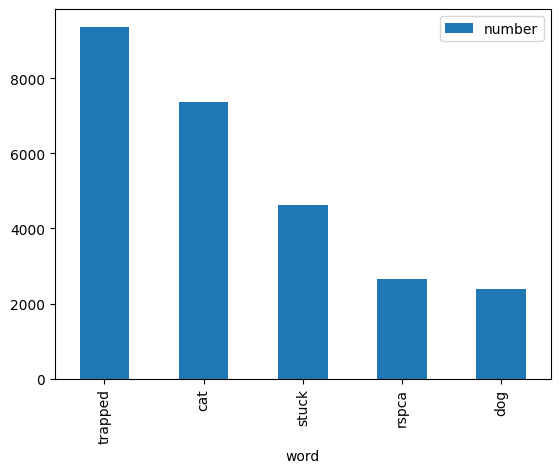

In [ ]:
print("Most Frequent words")
dfd.head().plot(kind = "bar", x = "word", y = "number")

In [ ]:
#take out all the words ending in ed

ed_words = []

for x in dfd.word:
  if x[-2:] == "ed":
    ed_words.append(x)

print(ed_words)


['trapped', 'injured', 'shed', 'locked', 'requested', 'called', 'distressed', 'barbed', 'required', 'impaled', 'tangled', 'believed', 'wedged', 'located', 'collapsed', 'bed', 'entangled', 'abandoned', 'implemented', 'advised', 'stranded', 'attacked', 'disabled', 'unoccupied', 'passed', 'attached', 'impailed', 'disused', 'gated', 'fitted', 'boarded', 'attended', 'behined', 'tapped', 'spiked', 'need', 'wrapped', 'wired', 'contacted', 'tried', 'suspected', 'wooded', 'traped', 'closed', 'released', 'parked', 'stated', 'enclosed', 'walled', 'beleived', 'unassisted', 'managed', 'terraced', 'pitched', 'climbed', 'red', 'escaped', 'received', 'jammed', 'blocked', 'jumped', 'slanted', 'concerned', 'fenced', 'involved', 'infirmed', 'betweed', 'contained', 'traaped', 'traced', 'borded', 'raised', 'dogtrapped', 'glazed', 'entwined', 'headtrapped', 'belieed', 'collasped', 'iced', 'insided', 'trappped', 'dehydrated', 'boxed', 'loced', 'sunbed', 'snagged', 'protected', 'verified', 'rescued', 'confine

In [ ]:
dfd_filtered = dfd[dfd.word.isin(ed_words)]

In [ ]:
dfd_filtered

,word,number
0,trapped,9372
23,injured,574
36,shed,334
43,locked,280
47,requested,274
...,...,...
2607,arranged,2
2618,expected,2
2624,electrified,2
2654,fixed,2


In [ ]:
d = {}

for a,x in dfd_filtered.values:
  d[a] = x

In [ ]:
d

{'trapped': 9372,
 'injured': 574,
 'shed': 334,
 'locked': 280,
 'requested': 274,
 'called': 120,
 'distressed': 104,
 'barbed': 76,
 'required': 64,
 'impaled': 54,
 'tangled': 50,
 'believed': 50,
 'wedged': 36,
 'located': 36,
 'collapsed': 30,
 'bed': 28,
 'entangled': 28,
 'abandoned': 26,
 'implemented': 26,
 'advised': 20,
 'stranded': 18,
 'attacked': 18,
 'disabled': 16,
 'unoccupied': 16,
 'passed': 16,
 'attached': 16,
 'impailed': 14,
 'disused': 14,
 'gated': 14,
 'fitted': 12,
 'boarded': 12,
 'attended': 12,
 'behined': 10,
 'tapped': 10,
 'spiked': 10,
 'need': 10,
 'wrapped': 10,
 'wired': 8,
 'contacted': 8,
 'tried': 8,
 'suspected': 6,
 'wooded': 6,
 'traped': 6,
 'closed': 6,
 'released': 6,
 'parked': 6,
 'stated': 6,
 'enclosed': 6,
 'walled': 4,
 'beleived': 4,
 'unassisted': 4,
 'managed': 4,
 'terraced': 4,
 'pitched': 4,
 'climbed': 4,
 'red': 4,
 'escaped': 4,
 'received': 4,
 'jammed': 4,
 'blocked': 4,
 'jumped': 4,
 'slanted': 4,
 'concerned': 4,
 'fenc

In [ ]:
# wc
wordcloud = WordCloud(background_color='gray',
                  	colormap = 'binary',
                  	max_font_size = 700,
                  	width = 800, height = 500)


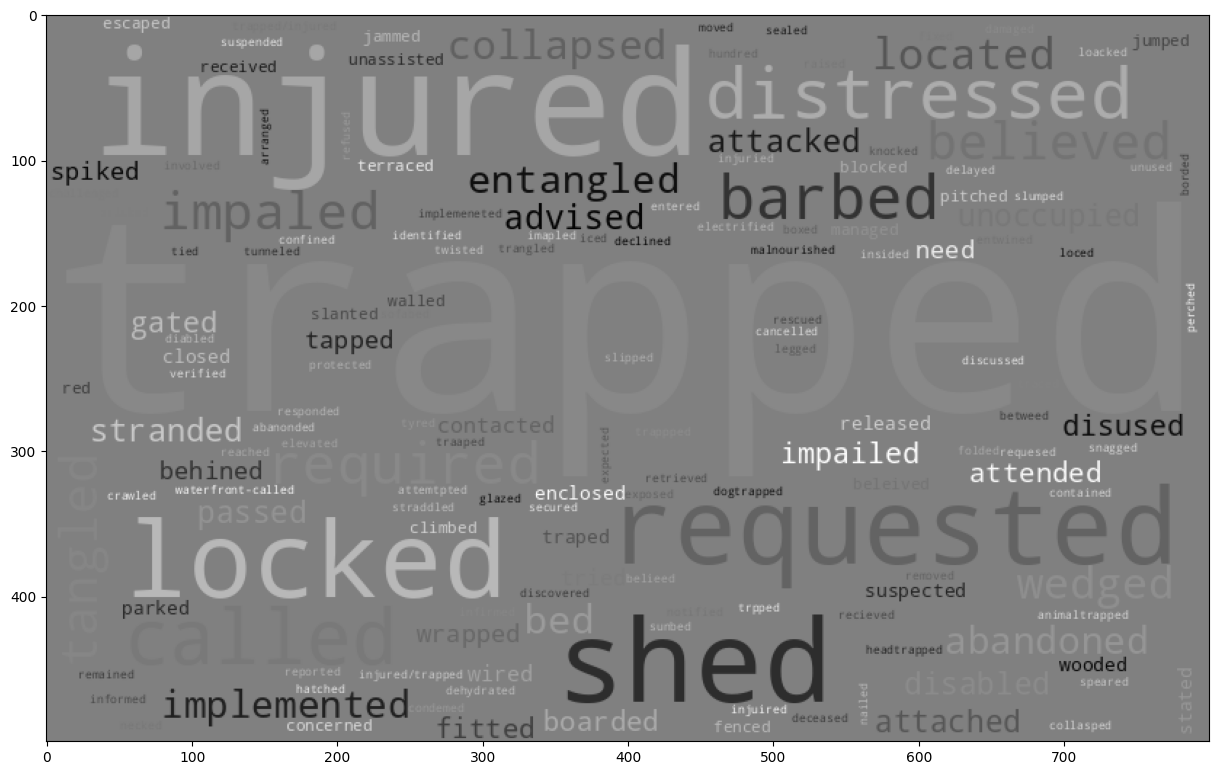

In [ ]:
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)


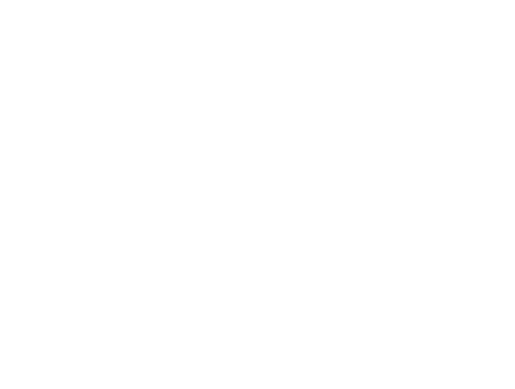

In [ ]:
plt.axis("off")
plt.show()